In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  importlib import reload
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import calibrate
import warp
import line
from lane import Lane

In [3]:
def ss_image(image, title='', filename='', gray=False):
    figure()
    ax = gca()
    ax.set_title(title)
    if gray:
        plt.imshow(image, cmap='Greys_r')
    else:
        plt.imshow(image)
    if len(filename)>0:
        plt.savefig(filename + '.jpg')

# Calibrating camera

In [4]:
files = ['camera_cal/calibration%d.jpg' % idx for idx in range(1, 21)]
ret, mtx, dist, rvecs, tvecs = calibrate.calibrate_camera(files)

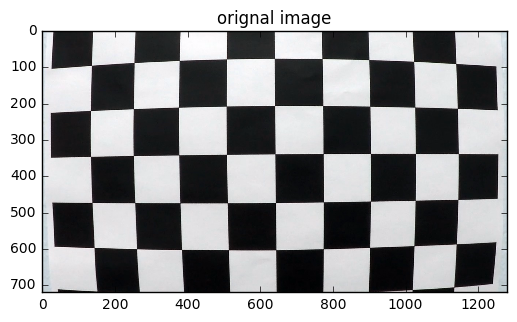

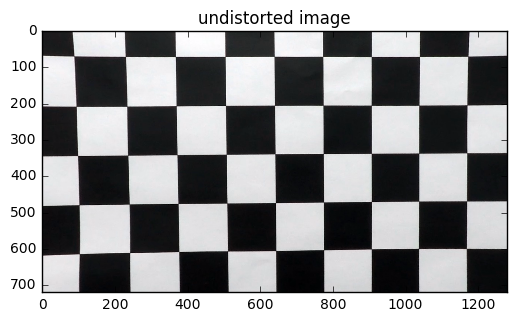

In [5]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
ss_image(img, 'orignal image', filename='output_images/original_image')
ss_image(dst, 'undistorted image', filename='output_images/undistorted_image')

** Test undistortion on an image **

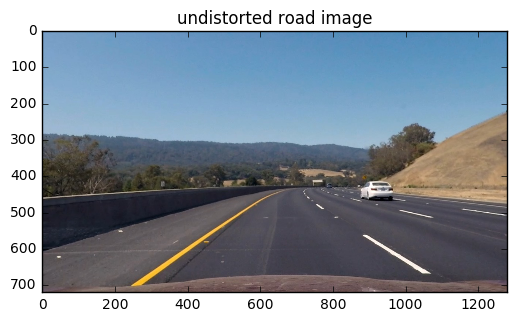

In [6]:
image = mpimg.imread('test_images/test3.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)
ss_image(undist, 'undistorted road image', filename='output_images/undistorted_road_image')

## Thresholded binary image

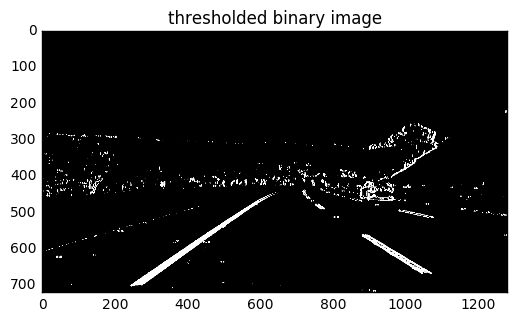

In [7]:
imgline = line.detect_line(undist)
ss_image(imgline, 'thresholded binary image', filename='output_images/thresholded_binary', gray=True)

## Perspective transform

In [8]:
image = mpimg.imread('test_images/straight_lines1.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)
warped = warp.warp_image(undist)

In [9]:
src = np.float32([
            [275, 680],
            [1045, 680],
            [734, 480],
            [554, 480]
            ])
dst = np.float32([
            [350, 700],
            [950, 700],
            [950, 0],
            [350, 0]
        ])

In [10]:
def add_polygon(image, points):
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask, np.int32([points]), (0,255, 0))
    return cv2.addWeighted(image, 1, mask, 0.3, 0)

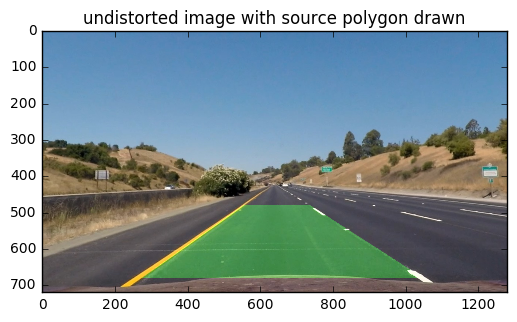

In [11]:
ss_image(add_polygon(undist, src), 'undistorted image with source polygon drawn',
         filename='output_images/straight_lines')

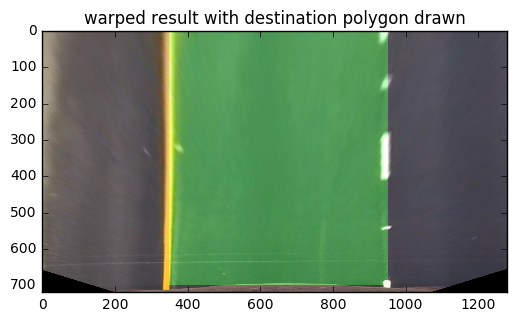

In [12]:
ss_image(add_polygon(warped, dst), 'warped result with destination polygon drawn',
         filename='output_images/warped_straight_lines')

## TEST

In [13]:
image = mpimg.imread('test_images/test3.jpg')
lane = Lane(mtx, dist)

In [14]:
undist, warped = lane.process_image(image)

In [15]:
result = lane.update_lane(image)

/Users/Pawel/CarND-Advanced-Lane-Lines/lane.py:50: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(image[image.shape[0] / image_frac:, :], axis=0)


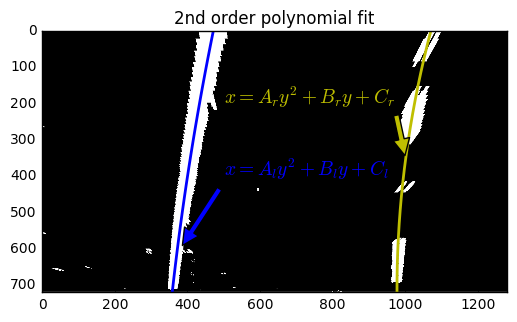

In [16]:
plt.imshow(warped, cmap='Greys_r')
plt.plot(lane.left_line.poly2(lane.left_line.best_fit), lane.left_line.yvals, '-b',  linewidth=2)
plt.plot(lane.left_line.poly2(lane.right_line.best_fit), lane.right_line.yvals, '-y',  linewidth=2)
ax = plt.gca()

ax.annotate(r'$x = A_l y^2 + B_l y + C_l$', xy=(380, 600), xytext=(500, 400),
            arrowprops=dict(facecolor='b', shrink=0.05),
            color='b', size=14
            )
ax.annotate(r'$x = A_r y^2 + B_r y + C_r$', xy=(1000, 350), xytext=(500, 200),
            arrowprops=dict(facecolor='y', shrink=0.05),
            color='y', size=14
            )
ax.set_xlim([0, warped.shape[1]])
ax.set_ylim([0, warped.shape[0]])
ax.invert_yaxis()
ax.set_title('2nd order polynomial fit')
plt.savefig('output_images/poly_fit.jpg')

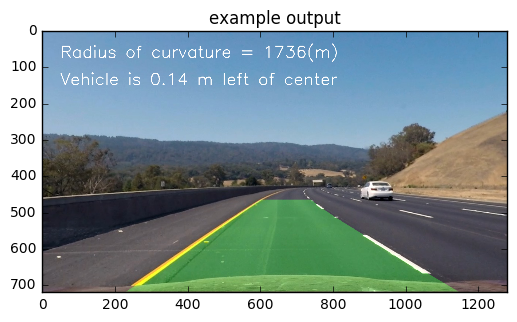

In [17]:
ss_image(result, 'example output',
         filename='output_images/example_output')

# Pipeline

In [18]:
lane = Lane(mtx, dist, n_iter=10)
def pipeline(image):
    result = lane.update_lane(image)
    return result

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
input_video = "project_video.mp4"
output_video = input_video[:-4] + '_with_lane.mp4'
clip1 = VideoFileClip(input_video)
output_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video project_video_with_lane.mp4
[MoviePy] Writing video project_video_with_lane.mp4


100%|█████████▉| 1260/1261 [05:43<00:00,  3.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_with_lane.mp4 

CPU times: user 8min 28s, sys: 1min 16s, total: 9min 44s
Wall time: 5min 45s


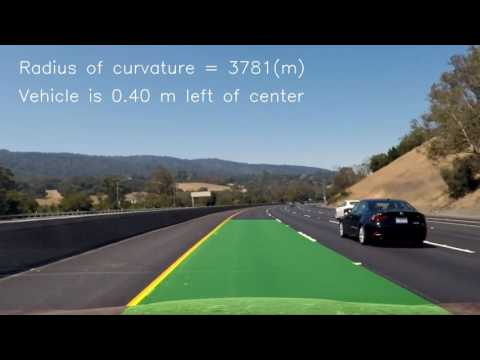

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo('vg3sN9wN-N0')

In [76]:
img = mpimg.imread('sign.jpg')

In [77]:
color_select = np.copy(img)

In [78]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

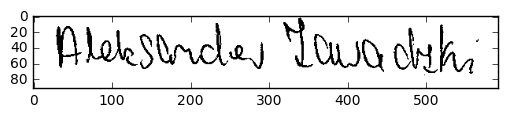

In [79]:
thresholds = (img[:,:,0] > rgb_threshold[0]) \
            & (img[:,:,1] > rgb_threshold[1]) \
            & (img[:,:,2] > rgb_threshold[2])
color_select[thresholds] = [255,255,255]
color_select[~thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)
plt.show()

In [81]:
plt.imsave('sign_mod.jpg', color_select)

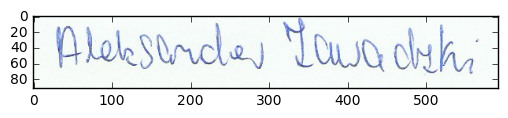

In [82]:
plt.imshow(img)